In [1]:
import numpy as np
import pandas as pd
import h5py
import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import pickle

sys.path.append(
    os.path.abspath(
        os.path.join("__file__", '..', '..')
    )
)

from util.notebook_util import convert_col_name_to_datetime 
from util.notebook_util import get_infected_population
from util.notebook_util import remove_zero_population
from util.notebook_util import get_epi_analysis
from util.notebook_util import compute_eff_rep_num
from util.notebook_util import get_infected_matrix, get_infected_matrix_updated
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
from env.env_setup import rep_num_logger
from util.plot_util import save_fig

## Environment Settings

In [2]:
# recovery days
recovery_day = rep_num_logger["recovery_day"]
print(f"The recovery day we set is {recovery_day}")

The recovery day we set is 14


In [3]:
###################
##### File settings
###################
# data directory
data_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'data')
)

# result directory
res_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'results')
)

# figure directory
fig_dir = os.path.abspath(
    os.path.join(os.path.curdir, '..', 'figures')
)

# clustering result directory
resfile = os.path.join(
    res_dir, 'safegraph_analysis.hdf5'
)

# epidemiology result directory
epi_resfile = os.path.join(
    res_dir, 'epi_analysis.hdf5'
)

##########################
##### Reproduction numbers
##########################
# reproduction numbers
base_path = os.path.join(os.path.abspath(os.path.join("__file__", '..', '..','results')))
save_file_name = 'rep_num_exp.pkl'
save_str = os.path.abspath(os.path.join(base_path, 
                                            save_file_name))  
with open(save_str, 'rb') as f:
    rep_num_logger = pickle.load(f)

# basic reproduction number matrix
basic_rep_num_mat = rep_num_logger["basic_reproduction_number_matrix"]

# effective reproduction number matrix
eff_rep_num_list = rep_num_logger["effective_reproduction_number_matrix"]

In [4]:
from numpy import linalg as LA

# loop through eff_rep_num_list
max_num = []
for i in range(len(eff_rep_num_list)):
    max_num.append(LA.eigvals(eff_rep_num_list[i].eff_rep_num_mat)[0])

File /home/python/shared/results/epi_analysis.hdf5 has 12 entries.


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Written file: /home/python/shared/figures/extra_global_eff_rep_num.png
Written file: /home/python/shared/figures/extra_global_eff_rep_num.svg


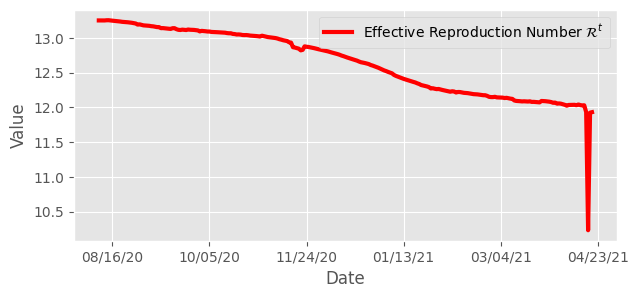

In [9]:
import datetime
import matplotlib.dates as mdates
plt.style.use('ggplot')
# open result file from clustering 
complevel=7
complib='zlib'
key_base = Path("/first_clustering")
with pd.HDFStore(epi_resfile, complevel=complevel, complib=complib) as store:
    print(f"File {epi_resfile} has {len(store.keys())} entries.")

    ########################################################
    ##### Load clustering and the corresponding csse results
    ########################################################
    # confirmed cases information
    key = str(key_base / 'basic' / "confirmed_cases")
    df_confirmed_case = store[key]


########################
##### Parameter settings
########################
date = df_confirmed_case.columns.to_list()
days = [datetime.datetime.strptime(date[i], '%m/%d/%y') for i in range(len(date))]
linewidth = 3
markersize = 6
fontsize = 12
start_index = 200

fig = plt.figure(figsize=(7,3))
ax = fig.add_subplot(111)
ax.plot(days[start_index:], max_num[start_index:], color = 'red', linestyle='-', linewidth=linewidth, label=r"Effective Reproduction Number $\mathcal{R}^t$")
ax.set_xlabel('Date', fontsize=fontsize)
ax.set_ylabel('Value', fontsize=fontsize)
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
save_fig(fig = fig,
             fname = 'extra_global_eff_rep_num',
             fig_dir = fig_dir)